<a href="https://colab.research.google.com/github/riad234/IPB-Semester2-PengenalanPola/blob/LKP-2/LKP2_PP_Riad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Error Classification

## 1.Menyesuaikan dengan Library yang akan digunakan

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 2.Melakukan pembangkitan data untuk setiap kelas (Asumsi ada dua kelas)

In [12]:
# Dua Classes (Asumsi Menggunakan Gaussan)
np. random. seed (42)

# Memangkitkan Data kelas 1
mu1, sigma1 = 2, 0.8
x1 = np. random.normal (mu1, sigma1, 100)

# membangkitkan Data kelas 2
mu2, sigma2 = 5, 1.0
x2 = np. random.normal(mu2, sigma2, 100)

## 3.Menentukan Posterior Probability

In [13]:
# Posterion Probability
P_w1 = 0.4
P_w2 = 0.6

## 4.Membuat fungsi likelihood

In [14]:
def likelihood (x, mu, sigma):
  return norm.pdf(x, mu, sigma)

## 5.Membuat fungsi posterior probability

In [15]:
# Fungsi posterior probability dengan pendekatan konsep bayes
# mencari peluang bayes yang menggunakan fungsi likelihood dengan fungsi bayes
# Silahkan melihat penjelasan detail fungsi likelihood

def posterior(x):
  p1 = likelihood(x, mu1, sigma1) * P_w1
  p2 = likelihood(x, mu2, sigma2) * P_w2
  return p1, p2

## 6.Membuat Fungsi Klasifikasi berdasarkan nilai posterior probability

In [16]:
# Minimum Error Rule
# Fungsi untuk klasifikasi dengan memanggil fungsi posterior probility

def classify(x):
  p1, p2 = posterior(x)
  return np.where(p1 > p2, 1, 2)

## 7.Visualisasi Data bangkitan

[1.76297841e-04 1.98177940e-04 2.22555014e-04 2.49685435e-04
 2.79848377e-04 3.13347426e-04 3.50512271e-04 3.91700456e-04
 4.37299201e-04 4.87727278e-04 5.43436949e-04 6.04915951e-04
 6.72689526e-04 7.47322487e-04 8.29421314e-04 9.19636262e-04
 1.01866349e-03 1.12724715e-03 1.24618153e-03 1.37631306e-03
 1.51854234e-03 1.67382610e-03 1.84317904e-03 2.02767555e-03
 2.22845138e-03 2.44670504e-03 2.68369914e-03 2.94076142e-03
 3.21928564e-03 3.52073218e-03 3.84662830e-03 4.19856818e-03
 4.57821258e-03 4.98728807e-03 5.42758595e-03 5.90096067e-03
 6.40932785e-03 6.95466171e-03 7.53899210e-03 8.16440091e-03
 8.83301793e-03 9.54701616e-03 1.03086064e-02 1.11200315e-02
 1.19835593e-02 1.29014760e-02 1.38760777e-02 1.49096621e-02
 1.60045194e-02 1.71629220e-02 1.83871143e-02 1.96793015e-02
 2.10416377e-02 2.24762137e-02 2.39850442e-02 2.55700542e-02
 2.72330655e-02 2.89757821e-02 3.07997762e-02 3.27064727e-02
 3.46971348e-02 3.67728486e-02 3.89345079e-02 4.11827992e-02
 4.35181865e-02 4.594089

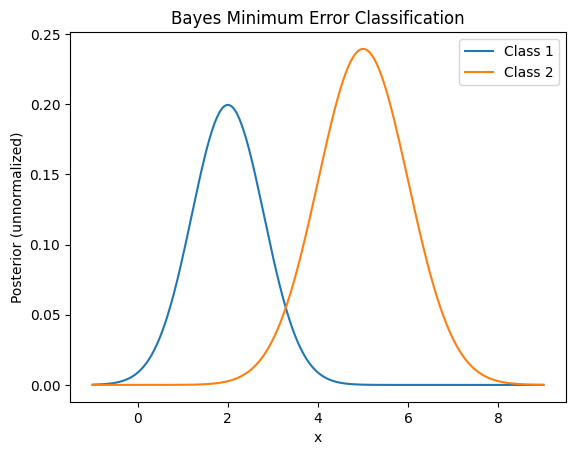

In [17]:
x_range = np.linspace(-1, 9, 400)
p1 = likelihood(x_range, mu1, sigma1) * P_w1
p2 = likelihood(x_range, mu2, sigma2) * P_w2

print (p1)
print (p2)

plt.figure()
plt.plot(x_range, p1, label='Class 1')
plt.plot(x_range, p2, label='Class 2')
plt.xlabel('x')
plt.ylabel('Posterior (unnormalized)')
plt.legend()
plt.title('Bayes Minimum Error Classification')
plt.show()

## 8.Melakukan klasifikasi dan menghitung error

In [18]:
# Gabungkan data
data = np.concatenate([x1, x2])
true_label = np.array([1]*len(x1) + [2]*len(x2))
print(true_label)

pred_label = classify(data)
print(pred_label)

error_rate = np.mean(pred_label != true_label)
print('Error Rate:', error_rate)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Error Rate: 0.01


# **Tugas**
# Perubahan pada nilai prior probability dan nilai mu dan sigma untuk masing-masing class    

## a.mu1=3, sigma1=0,8; mu2=4, sigma1=1; P_w1=0,2; P_w2=0,8

[3.71679879e-07 4.34494730e-07 5.07427185e-07 5.92020444e-07
 6.90038677e-07 8.03496369e-07 9.34691212e-07 1.08624091e-06
 1.26112434e-06 1.46272747e-06 1.69489454e-06 1.96198508e-06
 2.26893720e-06 2.62133790e-06 3.02550094e-06 3.48855308e-06
 4.01852924e-06 4.62447767e-06 5.31657564e-06 6.10625677e-06
 7.00635088e-06 8.03123734e-06 9.19701284e-06 1.05216750e-05
 1.20253223e-05 1.37303727e-05 1.56618003e-05 1.78473932e-05
 2.03180329e-05 2.31079959e-05 2.62552804e-05 2.98019577e-05
 3.37945513e-05 3.82844428e-05 4.33283082e-05 4.89885843e-05
 5.53339664e-05 6.24399391e-05 7.03893403e-05 7.92729601e-05
 8.91901740e-05 1.00249613e-04 1.12569866e-04 1.26280227e-04
 1.41521464e-04 1.58446637e-04 1.77221944e-04 1.98027600e-04
 2.21058747e-04 2.46526405e-04 2.74658432e-04 3.05700525e-04
 3.39917238e-04 3.77593013e-04 4.19033232e-04 4.64565268e-04
 5.14539554e-04 5.69330630e-04 6.29338193e-04 6.94988124e-04
 7.66733492e-04 8.45055515e-04 9.30464488e-04 1.02350064e-03
 1.12473496e-03 1.234769

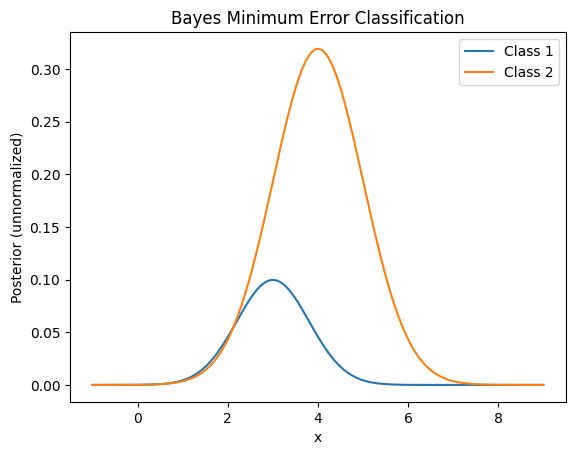

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2
 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Error Rate: 0.43


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Dua Classes (Asumsi Menggunakan Gaussan)
np. random. seed (42)

# Memangkitkan Data kelas 1
mu1, sigma1 = 3, 0.8
x1 = np. random.normal (mu1, sigma1, 100)

# membangkitkan Data kelas 2
mu2, sigma2 = 4, 1.0
x2 = np. random.normal(mu2, sigma2, 100)


# Posterion Probability
P_w1 = 0.2
P_w2 = 0.8


def likelihood (x, mu, sigma):
  return norm.pdf(x, mu, sigma)


# Fungsi posterior probability dengan pendekatan konsep bayes
# mencari peluang bayes yang menggunakan fungsi likelihood dengan fungsi bayes
# Silahkan melihat penjelasan detail fungsi likelihood

def posterior(x):
  p1 = likelihood(x, mu1, sigma1) * P_w1
  p2 = likelihood(x, mu2, sigma2) * P_w2
  return p1, p2


# Minimum Error Rule
# Fungsi untuk klasifikasi dengan memanggil fungsi posterior probility

def classify(x):
  p1, p2 = posterior(x)
  return np.where(p1 > p2, 1, 2)


x_range = np.linspace(-1, 9, 400)
p1 = likelihood(x_range, mu1, sigma1) * P_w1
p2 = likelihood(x_range, mu2, sigma2) * P_w2

print (p1)
print (p2)

plt.figure()
plt.plot(x_range, p1, label='Class 1')
plt.plot(x_range, p2, label='Class 2')
plt.xlabel('x')
plt.ylabel('Posterior (unnormalized)')
plt.legend()
plt.title('Bayes Minimum Error Classification')
plt.show()


# Gabungkan data
data = np.concatenate([x1, x2])
true_label = np.array([1]*len(x1) + [2]*len(x2))
print(true_label)

pred_label = classify(data)
print(pred_label)

error_rate = np.mean(pred_label != true_label)
print('Error Rate:', error_rate)

## b.mu1=2, sigma1=0,5; mu2=4, sigma1=1; P_w1=0,5; P_w2=0,5

[6.07588285e-09 8.19744819e-09 1.10320643e-08 1.48096128e-08
 1.98307635e-08 2.64876838e-08 3.52904622e-08 4.69007215e-08
 6.21742444e-08 8.22148602e-08 1.08442356e-07 1.42677792e-07
 1.87250347e-07 2.45130695e-07 3.20096979e-07 4.16940680e-07
 5.41721135e-07 7.02079196e-07 9.07622478e-07 1.17039699e-06
 1.50546258e-06 1.93159267e-06 2.47212226e-06 3.15597212e-06
 4.01888135e-06 5.10488574e-06 6.46808446e-06 8.17474385e-06
 1.03057936e-05 1.29597773e-05 1.62563281e-05 2.03402452e-05
 2.53862603e-05 3.16045847e-05 3.92473431e-05 4.86160030e-05
 6.00699200e-05 7.40361236e-05 9.10204764e-05 1.11620343e-04
 1.36538904e-04 1.66601263e-04 2.02772465e-04 2.46177574e-04
 2.98123910e-04 3.60125558e-04 4.33930217e-04 5.21548449e-04
 6.25285328e-04 7.47774467e-04 8.92014350e-04 1.06140680e-03
 1.25979739e-03 1.49151751e-03 1.76142771e-03 2.07496180e-03
 2.43817123e-03 2.85776896e-03 3.34117206e-03 3.89654218e-03
 4.53282276e-03 5.25977187e-03 6.08798948e-03 7.02893768e-03
 8.09495255e-03 9.299246

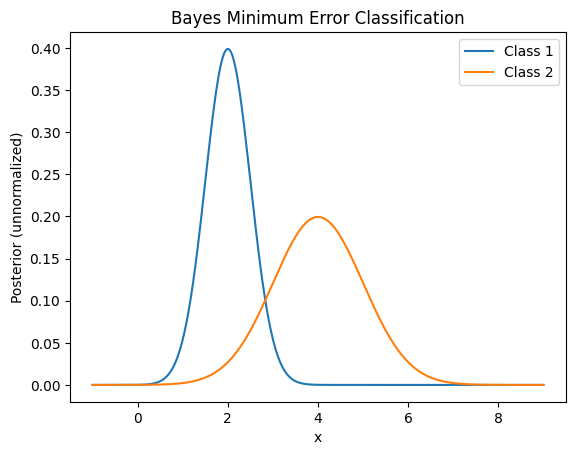

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 1
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2]
Error Rate: 0.06


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Dua Classes (Asumsi Menggunakan Gaussan)
np. random. seed (42)

# Memangkitkan Data kelas 1
mu1, sigma1 = 2, 0.5
x1 = np. random.normal (mu1, sigma1, 100)

# membangkitkan Data kelas 2
mu2, sigma2 = 4, 1.0
x2 = np. random.normal(mu2, sigma2, 100)


# Posterion Probability
P_w1 = 0.5
P_w2 = 0.5


def likelihood (x, mu, sigma):
  return norm.pdf(x, mu, sigma)


# Fungsi posterior probability dengan pendekatan konsep bayes
# mencari peluang bayes yang menggunakan fungsi likelihood dengan fungsi bayes
# Silahkan melihat penjelasan detail fungsi likelihood

def posterior(x):
  p1 = likelihood(x, mu1, sigma1) * P_w1
  p2 = likelihood(x, mu2, sigma2) * P_w2
  return p1, p2


# Minimum Error Rule
# Fungsi untuk klasifikasi dengan memanggil fungsi posterior probility

def classify(x):
  p1, p2 = posterior(x)
  return np.where(p1 > p2, 1, 2)


x_range = np.linspace(-1, 9, 400)
p1 = likelihood(x_range, mu1, sigma1) * P_w1
p2 = likelihood(x_range, mu2, sigma2) * P_w2

print (p1)
print (p2)

plt.figure()
plt.plot(x_range, p1, label='Class 1')
plt.plot(x_range, p2, label='Class 2')
plt.xlabel('x')
plt.ylabel('Posterior (unnormalized)')
plt.legend()
plt.title('Bayes Minimum Error Classification')
plt.show()


# Gabungkan data
data = np.concatenate([x1, x2])
true_label = np.array([1]*len(x1) + [2]*len(x2))
print(true_label)

pred_label = classify(data)
print(pred_label)

error_rate = np.mean(pred_label != true_label)
print('Error Rate:', error_rate)

**Evaluasi eksperimen perubahan prior dan parameter Gaussian.**

1. Eksperimen Awal (baseline)<br>
Analisis:<br>
* Mean cukup jauh (2 vs 5), menunjukan overlap kecil
* Variansi relatif kecil yang berarti distribusi cukup tajam
* Prior lebih besar ke kelas 2 mengakibatkan decision boundary sedikit bergeser ke kiri<br>
Dampak:<br>
* Error relatif kecil
* Sebagian besar kesalahan terjadi di area overlap sekitar titik tengah distribusi<br><br>
Semakin jauh jarak mu1 dan mu2, maka akan semakin kecil error.
<br><br>
2. Eksperimen a<br>
Perubahan:<br>
* Mean makin dekat, jarak mean hanya 1 unit dan menyebabkan overlap meningkat drastis.
* Prior sangat tidak seimbang
Kelas 2 jauh lebih dominan (0.8).<br>
Dampak:<br>
* Decision boundary bergeser ke arah kelas 1
* Sistem cenderung mengklasifikasikan lebih banyak data sebagai kelas 2
* Error kelas minoritas (w1) meningkat<br><br>
Pada kondisi distribusi yang sangat tumpang tindih dan prior tidak seimbang, classifier Bayes minimum error akan bias terhadap kelas dengan prior lebih besar. Biasanya terjadi karena:
* Total error naik
* Error kelas 1 lebih tinggi daripada kelas 2
<br><br>
3. Eksperimen b<br>
Perubahan:<br>
* Mean lebih jauh dibanding eksperimen a. Jarak = 2 yang membuat overlap berkurang.
* Variansi kelas 1 lebih kecil. Distribusi kelas 1 lebih sempit (lebih yakin)
* Prior seimbang<br>
Dampak:<br>
* Decision boundary lebih netral
* Error lebih kecil dibanding eksperimen A
* Bias antar kelas berkurang<br><br>
Secara teori ini konfigurasi lebih “ideal” daripada eksperimen A.